In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, model_selection

# Read the data
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [46]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [47]:
columnsToKeep = ['Package' ,'Low Price', 'High Price', 'Date']
pumpkins = pumpkins[columnsToKeep]
pumpkins.head()

,Package,Low Price,High Price,Date
70,1 1/9 bushel cartons,15.0,15.0,9/24/16
71,1 1/9 bushel cartons,18.0,18.0,9/24/16
72,1 1/9 bushel cartons,18.0,18.0,10/1/16
73,1 1/9 bushel cartons,17.0,17.0,10/1/16
74,1 1/9 bushel cartons,15.0,15.0,10/8/16


In [48]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
price.head()

70    15.0
71    18.0
72    18.0
73    17.0
74    15.0
dtype: float64

In [49]:
month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Int64Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=415)


## Create a new dataframe with the columns: 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'
it inserts the new features that we extracted and the data from the csv file

In [50]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,1 1/9 bushel cartons,15.0,15.0,15.0


## Normalize the pricing so that you show the pricing per bushel

In [51]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


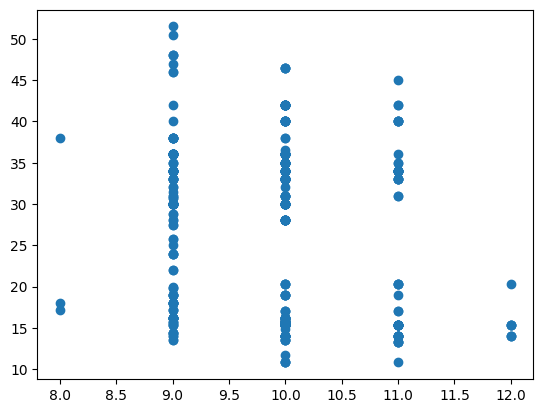

In [52]:
plt.scatter(new_pumpkins['Month'], new_pumpkins['Price'])
plt.show()

## Calculate the mean of the normalized pricing for each month

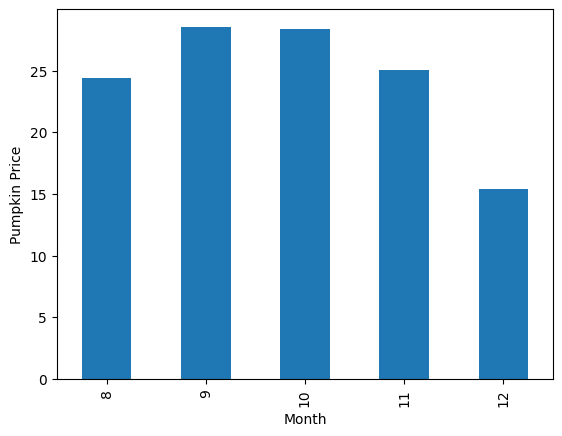

In [53]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")
plt.show()

In [54]:
X = new_pumpkins['Month'].values.reshape(-1, 1)
y = new_pumpkins['Price'].values.reshape(-1, 1)

## split the data into training and testing sets

In [55]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=0)

## Train the model on the training data

In [56]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
price_pred = model.predict(x_test)

## Plot the result

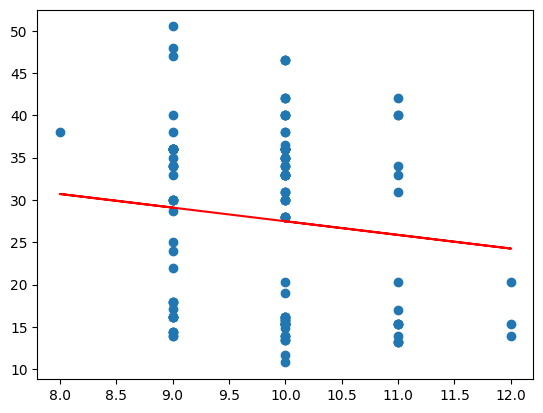

In [57]:
plt.scatter(x_test, y_test)
plt.plot(x_test, price_pred, color='red')
plt.show()